In [2]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

In [3]:
class pt:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def distance(target, other):
    dist = (target.x - other.x)**2 + (target.y-other.y)**2
    return np.round(math.sqrt(dist), 4)
  def direction(target, other, num_of_pieces=8):
    a = other.y - target.y
    b = other.x - target.x
    theta = (round(np.arctan2(a, b)/math.pi*180,4))
    if theta < 0:
      theta = theta + 360
    a_pieces = 360 / num_of_pieces
    dir = int(theta / a_pieces)
    return dir

In [4]:
df = pd.read_csv('./8415.csv')
df

,frame_id,agent_id,pos_x,pos_y,vel_x,vel_y,scene_id,label,timestamp
0,8415,175,9.980143,4.572062,1.476375,0.507968,0,pedestrian,561.0
1,8415,174,7.763284,7.360106,1.511990,-0.460956,0,pedestrian,561.0
2,8415,176,6.372150,6.453113,-2.083991,0.219128,0,pedestrian,561.0
3,8415,177,3.600584,7.471539,1.610575,0.165052,0,pedestrian,561.0
4,8415,178,2.991217,5.585358,1.698295,0.094163,0,pedestrian,561.0
5,8415,179,2.910753,4.439162,1.520995,0.070057,0,pedestrian,561.0
6,8415,182,0.574332,5.912362,1.863154,0.030781,0,pedestrian,561.0
7,8415,184,0.114369,7.249820,1.762417,0.175632,0,pedestrian,561.0
8,8415,183,-0.315940,6.455145,1.890560,-0.151986,0,pedestrian,561.0
9,8415,181,0.436485,4.825554,1.486574,0.011782,0,pedestrian,561.0


In [5]:
num_of_pieces = 72
max_dist = 8
target = df.iloc[0]
target_pt = pt(target[2],target[3])
other = df.iloc[10]
other_pt = pt(other[2],other[3])
dist = pt.distance(target_pt, other_pt)
dir = pt.direction(target_pt, other_pt, num_of_pieces)


In [11]:
surrounding = np.ones(num_of_pieces)
for i in range(1,len(df)):
  other = df.iloc[i]
  other_pt = pt(other[2],other[3])
  dist = pt.distance(target_pt, other_pt)
  dist = np.round(dist / max_dist, 2)
  if dist > 1:
    continue
  else:
    pass
  dir = pt.direction(target_pt, other_pt, num_of_pieces)
  if dist < surrounding[dir]:
    surrounding[dir] = dist
  
  print(i, dir, dist)
print(surrounding)

  

1 25 0.45
2 30 0.51
3 31 0.88
4 34 0.88
5 36 0.88
[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.45 1.   1.
 1.   1.   0.51 0.88 1.   1.   0.88 1.   0.88 1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]


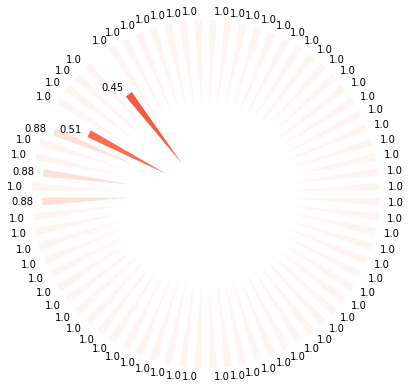

In [24]:
cmap = plt.get_cmap("Reds")
color = cmap(np.array(np.abs(surrounding-1)))
plt.pie(np.ones(num_of_pieces),
        explode = surrounding,
        labels = surrounding,
        colors = color,
        textprops = {"fontsize" : 10})
plt.show()